In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

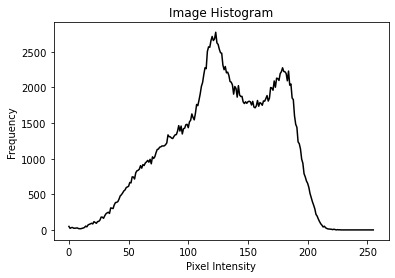

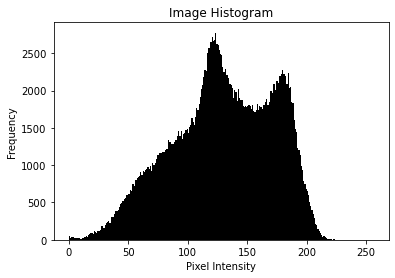

In [4]:
# Load the image in grayscale mode
image = cv2.imread('../IMAGES/Gbaboon.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot the histogram
plt.plot(histogram, color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Image Histogram')
plt.show()


# Plot the histogram
plt.hist(image.ravel(), 256, [0, 256], color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Image Histogram')
plt.show()



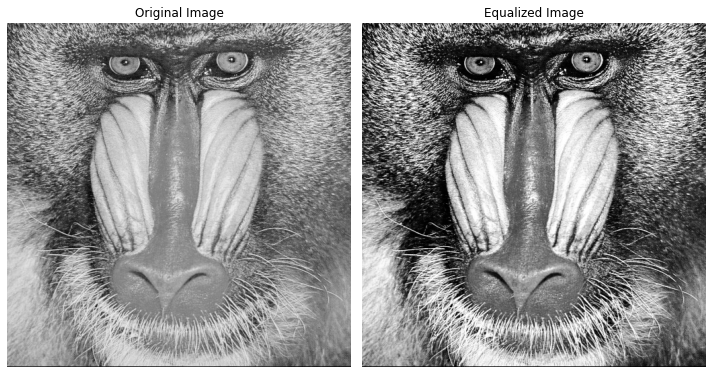

In [5]:
def histogram_equalization(image):
    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(image)
    return equalized_image


# Perform histogram equalization
equalized_image = histogram_equalization(image)

# Plot original and equalized images
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()
